# Modelo de Regressão Linear - Predição de Consumo

## Beer Consumption - Sao Paulo

### Sobre o conjunto de dados

A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde happy hour até grandes festas de casamento. Se você pensar bem, já está com vontade de tomar uma cerveja, não está sozinho.

A verdade é que ao redor do mundo milhares de pessoas consomem a bebida regularmente e também em diversas situações. Mas você já parou para pensar quais são os países que mais consomem cerveja no mundo? O primeiro que lhe veio à cabeça foi a Alemanha? Pois bem, saiba que não é assim.

A resposta a esta pergunta é contundente: a República Checa. De acordo com pesquisa da empresa japonesa de bebidas Kirin, o país liderou a tabela de consumo per capita de cerveja por 23 anos consecutivos.

Em 2015, o ano mais recente para o qual existem estatísticas disponíveis, os checos beberam 142,4 litros por pessoa. Isso equivale a 250 litros – ou um a cada 35 horas. Mas, dado que é pouco provável que os menores contribuam para esse número, é seguro assumir que o bebedor médio de cerveja provavelmente bebe um pouco mais.

Atrás dos calcanhares da República Checa estão os pretendentes habituais. A Áustria e a Alemanha aparecem em terceiro e quarto lugar, a Polónia em sexto e a Irlanda em sétimo. Há, no entanto, algumas surpresas. Em segundo lugar estão as Seychelles, uma classificação elevada que atribuímos ao clima quente e ao grande número de turistas.

**Os dados (amostra) foram coletados em São Paulo — Brasil, em uma área universitária, onde existem algumas festas com grupos de estudantes de 18 a 28 anos de idade (média). O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo um Target, com período de um ano.**

Fonte: Kaggle

https://www.kahttps://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo/dataggle.com/datasets/dongeorge/beer-consumption-sao-paulo/data

## Problema de negócio

Prever a demanda de cerveja para evitar falta ou excesso de estoque. Modelos de previsão com base em dados históricos e variáveis como clima e eventos ajudam a otimizar o inventário e garantir a satisfação do cliente.

### Importando Bibliotecas

In [123]:
# Biblioteca de manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Biliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [87]:
# Importando Dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/MARINHOALEX/Beer-Consumption/main/Consumo_cerveja.csv')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Visualizando dados em branco
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [89]:
# Excluindo valores nulos
df.dropna(inplace=True)

In [90]:
# Visualizando tipo de dados
df.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

In [91]:
# Formatando colunas
df.Data = pd.to_datetime(df['Data'], format='%Y-%m-%d').dt.to_period('M')
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',','.').astype(float)
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',','.').astype(float)
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',','.').astype(float)
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',','.').astype(float)

In [92]:
# Visualizando DataFrame
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12,21.38,19.3,22.4,6.3,0.0,20.467


In [93]:
# Visualizando estatisticas descritivas
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


### Etapa de EDA

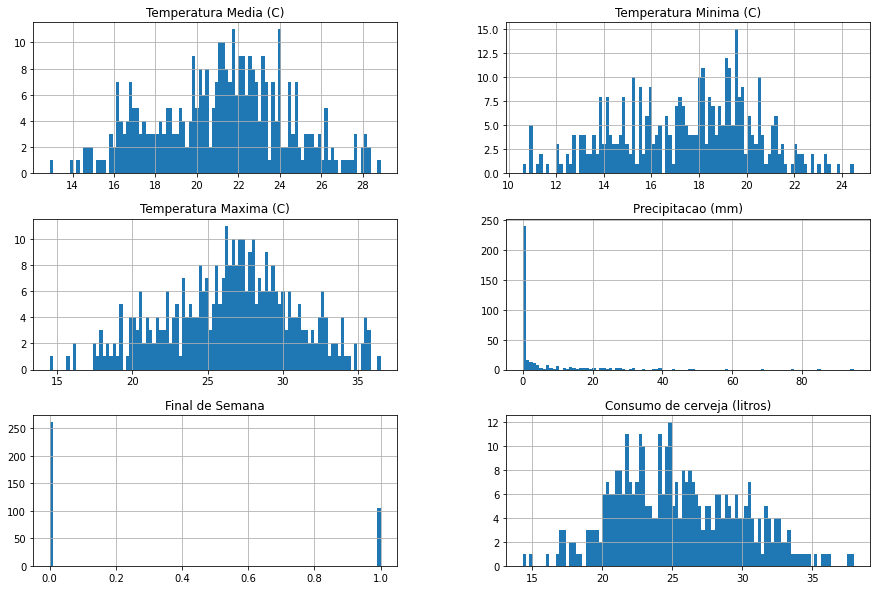

In [96]:
# Avaliando distribuições
df.hist(figsize=(15,10), bins=100);

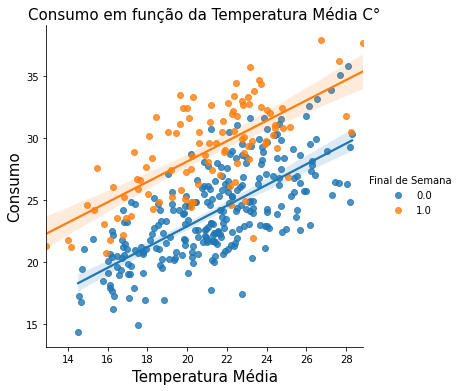

In [100]:
# Analisando consumo em função da temperatura média
sns.lmplot(data=df, x='Temperatura Media (C)', y='Consumo de cerveja (litros)', hue='Final de Semana');
plt.title('Consumo em função da Temperatura Média C°', fontsize=15)
plt.ylabel('Consumo', fontsize=15)
plt.xlabel('Temperatura Média', fontsize=15)
plt.show()

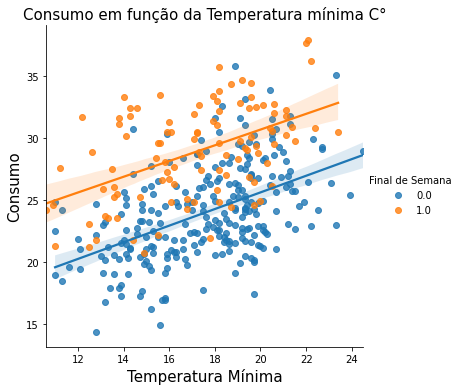

In [101]:
# Analisando consumo em função da Temperatura mínima
sns.lmplot(data=df, x='Temperatura Minima (C)', y='Consumo de cerveja (litros)', hue='Final de Semana');
plt.title('Consumo em função da Temperatura mínima C°', fontsize=15)
plt.ylabel('Consumo', fontsize=15)
plt.xlabel('Temperatura Mínima', fontsize=15)
plt.show()

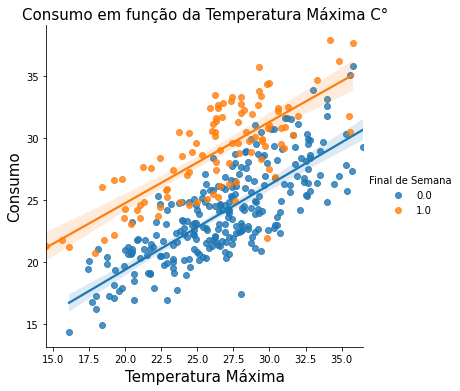

In [102]:
# Analisando consumo em função da Temperatura máxima
sns.lmplot(data=df, x='Temperatura Maxima (C)', y='Consumo de cerveja (litros)', hue='Final de Semana');
plt.title('Consumo em função da Temperatura Máxima C°', fontsize=15)
plt.ylabel('Consumo', fontsize=15)
plt.xlabel('Temperatura Máxima', fontsize=15)
plt.show()

Em ambas as labels, o consumo é maior com a temperatura mais alta, inclinando respondendo mais aos números de temperatura máxima e um pouco menos aos de temperatura mínima. e ao fins de semana.

Aos fins de semana, o consumo acompanha a tendência de temperatura, mas o consumo é potencializado.

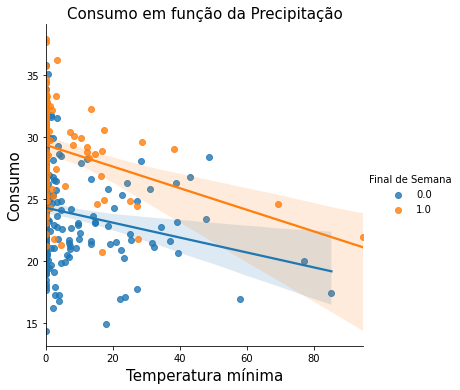

In [115]:
temperatura # Analisando consumo em função da preceptação
sns.lmplot(data=df, x='Precipitacao (mm)', y='Consumo de cerveja (litros)', hue='Final de Semana');
plt.title('Consumo em função da Precipitação', fontsize=15)
plt.ylabel('Consumo', fontsize=15)
plt.xlabel('Temperatura mínima', fontsize=15)
plt.show()

O consumo tente a diminuir com o aumento do volume de chuva

In [104]:
# Visualizando intervalo de data
df.Data.min(), df.Data.max()

(Period('2015-01', 'M'), Period('2015-12', 'M'))

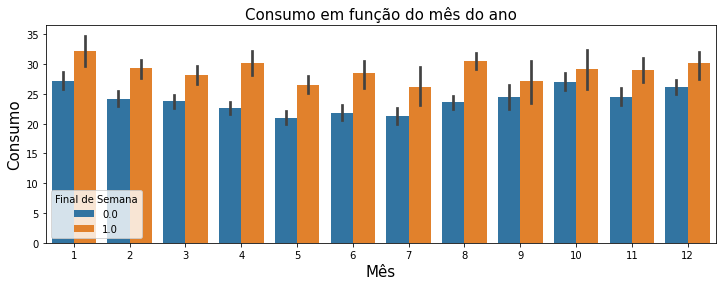

In [114]:
# Analisando consumo em função do tempo
df['Mes'] = df.Data.dt.month

plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Mes', y='Consumo de cerveja (litros)', hue='Final de Semana');
plt.title('Consumo em função do mês do ano', fontsize=15)
plt.ylabel('Consumo', fontsize=15)
plt.xlabel('Mês', fontsize=15)
plt.show()

O consumo é maior nos meses quentes, porém isso já é representado pelos dados de temperatura.

Alem disso, tenho apenas 1 anos para consulta, impossibilitando analise comparativas. Portanto, não vou utilizar esses dados.

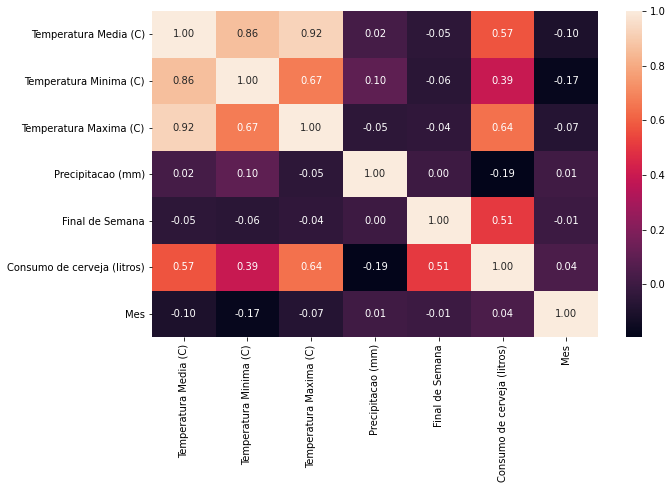

In [139]:
# Analisando Correlações
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

### Modelagem

In [ ]:
# Separando DataFrame em X e y
X = df.drop(columns=['Data', 'Mes', 'Consumo de cerveja (litros)'])
y = df['Consumo de cerveja (litros)']

# Seprando em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [125]:
# Modelo LinearRegression

# Estancando Modelo
lr_model = LinearRegression()

# Treinando regressor
lr_model.fit(X_train, y_train)

# Predizendo valores
lr_pred = lr_model.predict(X_test)

# Calculando R²
lr_r2 = lr_model.score(X_test, y_test)
print("R²:", lr_r2)

# Calcunando a Raiz do Erro Quadrático Médio
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred, squared=False))
print("RMSE:", lr_rmse)

R²: 0.777450331769559
RMSE: 1.4956302343209438


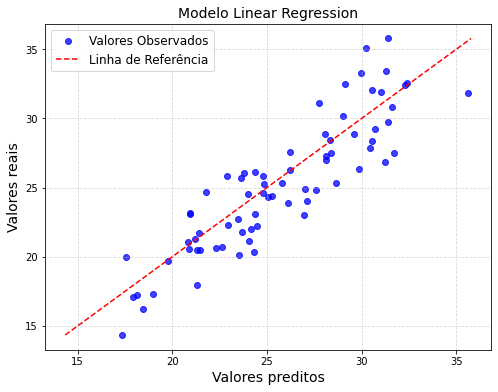

In [138]:
# Plotando gráfico de dispersão dos valores preditos

# Definindo dimensões
plt.figure(figsize=(8,6))

# Gráfico de dispersão
plt.scatter(x=lr_pred, y=y_test, color='blue', alpha=0.75, label='Valores Observados')

# Linha de referência
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha de Referência')

# Informações
plt.title('Modelo Linear Regression', fontsize=14)
plt.xlabel('Valores preditos', fontsize=14)
plt.ylabel('Valores reais', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

Conforme indicado pelo coeficiente de determinação *(R²)*, o modelo linear explica aproximadamente 77,75% da variabilidade dos dados.

O RMSE *(Raiz do Erro Quadrático Médio)* de aproximadamente 1.50 indica que, em média, as previsões do modelo estão a 1.50 unidades de distância dos valores reais.